In [1]:
import pandas as pd

In [5]:
sales = pd.read_csv(r'C:/Users/aadis/Downloads/LaptopSales-1.csv')
sales.head(6)

,Configuration Index,RAM (GB),Processor Speeds (GHz),Integrated Wireless,HD Size (GB),Bundled Applications,Retail Price
0,290,1,1.5,Yes,40,No,287
1,208,2,1.5,No,300,No,329
2,292,1,1.5,Yes,80,No,315
3,342,2,1.5,Yes,120,No,357
4,304,1,1.5,No,300,No,357
5,347,2,1.5,No,80,Yes,364


In [6]:
sales.dtypes

Configuration Index         int64
RAM (GB)                    int64
Processor Speeds (GHz)    float64
Integrated Wireless        object
HD Size (GB)                int64
Bundled Applications       object
Retail Price                int64
dtype: object

In [7]:
sales.describe()

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
count,25649.000000,25649.000000,25649.000000,25649.000000,25649.000000
mean,371.427424,2.194121,1.910168,131.352489,370.166595
std,225.426489,1.100078,0.410171,99.101622,68.489926
min,1.000000,1.000000,1.500000,40.000000,168.000000
25%,201.000000,1.000000,1.500000,40.000000,322.000000
50%,332.000000,2.000000,2.000000,80.000000,364.000000
75%,542.000000,2.000000,2.400000,120.000000,413.000000
max,864.000000,4.000000,2.400000,300.000000,623.000000


In [8]:
sales.isnull().any()

Configuration Index       False
RAM (GB)                  False
Processor Speeds (GHz)    False
Integrated Wireless       False
HD Size (GB)              False
Bundled Applications      False
Retail Price              False
dtype: bool

In [9]:
corr = sales.corr()
corr

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
Configuration Index,1.000000,0.043779,0.042447,-0.103127,0.533884
RAM (GB),0.043779,1.000000,-0.048288,-0.084440,0.516761
Processor Speeds (GHz),0.042447,-0.048288,1.000000,-0.033960,0.204376
HD Size (GB),-0.103127,-0.084440,-0.033960,1.000000,0.321109
Retail Price,0.533884,0.516761,0.204376,0.321109,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

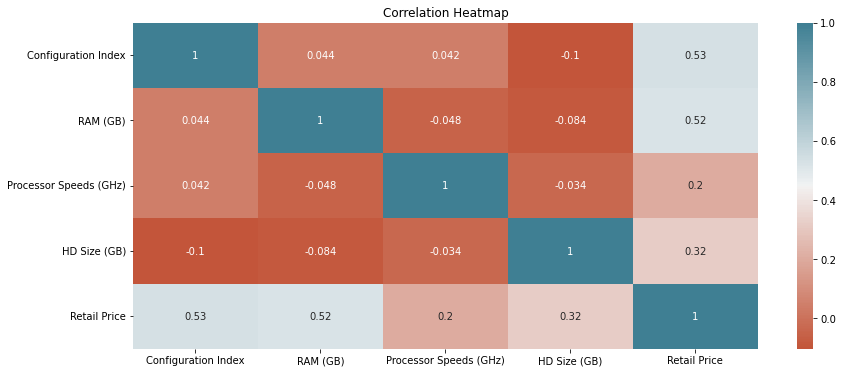

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(20, 220, n=200))
plt.title('Correlation Heatmap')

In [11]:
X = pd.get_dummies(sales[['Configuration Index','RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless',
 'HD Size (GB)', 'Bundled Applications']], drop_first = True)
y = sales[['Retail Price']]

In [12]:
X

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,290,1,1.5,40,1,0
1,208,2,1.5,300,0,0
2,292,1,1.5,80,1,0
3,342,2,1.5,120,1,0
4,304,1,1.5,300,0,0
...,...,...,...,...,...,...
25644,479,1,2.4,300,0,1
25645,589,1,1.5,120,0,1
25646,731,1,1.5,80,0,1
25647,375,2,2.4,300,1,1


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(20519, 6)

In [14]:
from sklearn.linear_model import LinearRegression
sales_regressor = LinearRegression()
sales_regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(sales_regressor.coef_, columns= X.columns)
coeff_df

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,0.173125,34.974064,38.247655,0.304455,15.538897,35.992358


In [15]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Retail Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.731e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:18:53   Log-Likelihood:                -97410.
No. Observations:               20519   AIC:                         1.948e+05
Df Residuals:                   20512   BIC:                         1.949e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [16]:
y_train_pred = sales_regressor.predict(X_train)
y_test_pred = sales_regressor.predict(X_test)

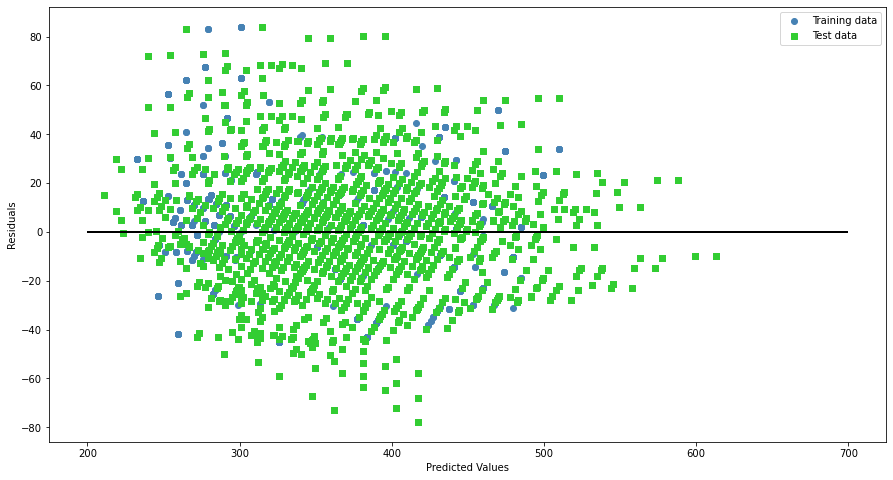

In [17]:
plt.figure(figsize = (15,8))
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker = 'o', label = "Training data")
plt.scatter(y_test_pred, y_test_pred-y_test, color = 'limegreen', marker = 's',label='Test data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc = 'upper right')
plt.hlines(y = 0,xmin = 200, xmax = 700, color = 'black', lw =2)
plt.show()

In [18]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error on Test Data:', metrics.mean_squared_error(y_test, y_test_pred))
print('Mean Squared Error on Training Data:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error on Test Data: 21.59110673795883
Mean Absolute Error on Training Data: 21.76019884883132
Mean Squared Error on Test Data: 768.2924424521239
Mean Squared Error on Training Data: 777.9861978009388
Root Mean Squared Error on Test Data: 27.71808872292828
Root Mean Squared Error on Training Data: 27.8924039444602


In [19]:
from sklearn.metrics import r2_score
r_sq_test = r2_score(y_test, y_test_pred)
r_sq_train = r2_score(y_train, y_train_pred)
print('R squared on test set:', r_sq_test)
print('R squared on training set:', r_sq_train)

R squared on test set: 0.8323889325785556
R squared on training set: 0.8350651328238885
